In [149]:
# Importing the libraries
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [150]:
df=pd.read_csv('creditcard.csv')
print('This data frame has {} records and {} columns.'.format(df.shape[0], df.shape[1]))
df.head()

This data frame has 284807 records and 31 columns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [151]:
counts = df.Class.value_counts()
print('No Frauds', round(counts[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(counts[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [152]:
one = 0
zero = 0
for i in range(0,284807):
    if(df['Class'].iloc[i] == 0):
        zero+=1
    if(df['Class'].iloc[i]==1):
        one+=1
#print(df['Class'].iloc[0])
print(zero)
print(one)

284315
492


# Smote Oversampling

In [153]:
from imblearn.over_sampling import SMOTE

In [154]:
X = df.iloc[:, [1, 29]].values
y = df.iloc[:, 30].values 
smote = SMOTE(sampling_strategy=('minority'))

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [156]:
one_new = 0
zero_new = 0
for i in range(0, len(y_sm)):
    if(y_sm[i] == 1):
        one_new += 1
    if(y_sm[i] == 0):
        zero_new += 1
print(zero_new)
print(one_new)

227454
227454


# LogisticRegression 

In [157]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_sm, y_sm)
y_pred26 = classifier.predict(X_test)
cm26 = confusion_matrix(y_test, y_prediction)
print('Confusion matrix for OVersampling(SMOTE) + Logistic Regression')
print(cm26)
# print(classification_report(y_test,y_prediction))

Confusion matrix for OVersampling(SMOTE) + Logistic Regression
[[47247  9614]
 [   33    68]]


In [158]:
print("LR Accuracy:",accuracy_score(y_test, y_pred26))

LR Accuracy: 0.8306239247217443


# Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier  
classifier_random= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_random.fit(X_sm, y_sm)  
y_pred28 = model.predict(X_test)
cm28 = confusion_matrix(y_test, y_pred28)
print('Confusion matrix for OVersampling(SMOTE) + RF')
print(cm28)

Confusion matrix for OVersampling(SMOTE) + RF
[[51799  5062]
 [   44    57]]


In [168]:
print(y_test[0])
print(classifier_random.predict([X_test[0]]))

0
[0]


In [163]:
print("RF Accuracy:",accuracy_score(y_test, y_pred28))

RF Accuracy: 0.8374530388680173


# XgBoost

In [164]:
model = XGBClassifier(random_state=42)
model.fit(X_sm, y_sm)
y_pred30 = model.predict(X_test)
cm30 = confusion_matrix(y_test, y_pred30)
print('Confusion matrix for OVersampling(SMOTE) + XGBoost')
print(cm30)
# print(classification_report(y_test,y_pred30))

Confusion matrix for OVersampling(SMOTE) + XGBoost
[[51799  5062]
 [   44    57]]


In [165]:
print("XgBoost Accuracy:",accuracy_score(y_test, y_pred30))

XgBoost Accuracy: 0.9103612934939083


# KNN

# Finding best K value

Maximum accuracy:- is at K = 1


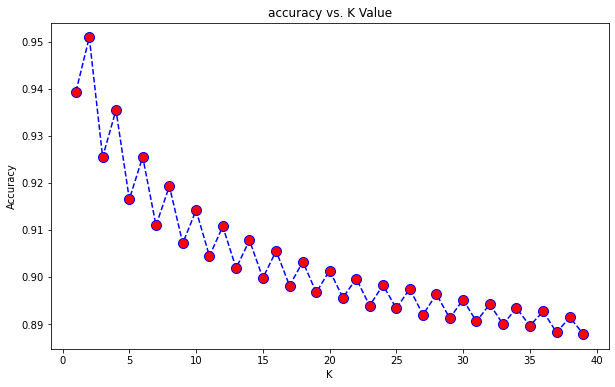

In [166]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_sm,y_sm)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:- is at K =",acc.index(max(acc)))

Minimum error:- 0.04871668831852814 at K = 1


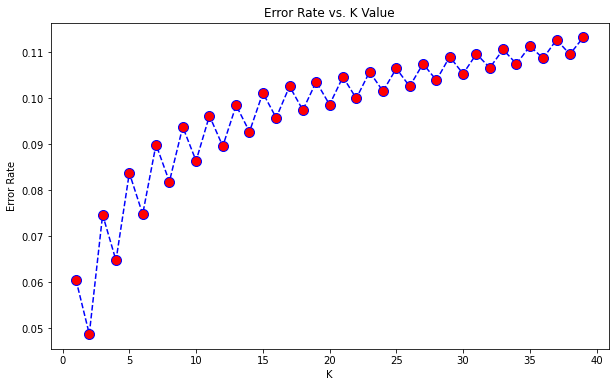

In [131]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_sm, y_sm)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


In [171]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_sm, y_sm)
y_pred32 = model.predict(X_test)
cm32 = confusion_matrix(y_test, y_pred32)
print('Confusion matrix for OVersampling(SMOTE) + KNN')
print(cm32)
# print(classification_report(y_test,y_pred32))

Confusion matrix for OVersampling(SMOTE) + KNN
[[53473  3388]
 [   65    36]]


In [172]:
print("KNN Accuracy:",accuracy_score(y_test, y_pred32))

KNN Accuracy: 0.9393806397247287


# Guassian Naive Bayes

In [173]:
from sklearn.naive_bayes import GaussianNB
model =  GaussianNB()
model.fit(X_sm, y_sm)
y_pred34 = model.predict(X_test)
cm34 = confusion_matrix(y_test, y_pred34)
print('Confusion matrix for OVersampling(SMOTE) + GNB')
print(cm34)
# print(classification_report(y_test,y_pred34))

Confusion matrix for OVersampling(SMOTE) + GNB
[[54115  2746]
 [   57    44]]


In [174]:
print("GNB Accuracy:",accuracy_score(y_test, y_pred34))

GNB Accuracy: 0.950791755907447


# AdaBoost

In [116]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_sm, y_sm)
y_pred36 = model.predict(X_test)
cm36 = confusion_matrix(y_test, y_pred36)
print('Confusion matrix for OVersampling(SMOTE) + ADB')
print(cm36)
# print(classification_report(y_test,y_pred36))

Confusion matrix for OVersampling(SMOTE) + ADB
[[47622  9239]
 [   20    81]]


In [133]:
print("ADB Accuracy:",accuracy_score(y_test, y_pred36))

ADB Accuracy: 0.8374530388680173


# Comparing accuracies

Text(0.5, 1.0, 'Accuracy Comparison')

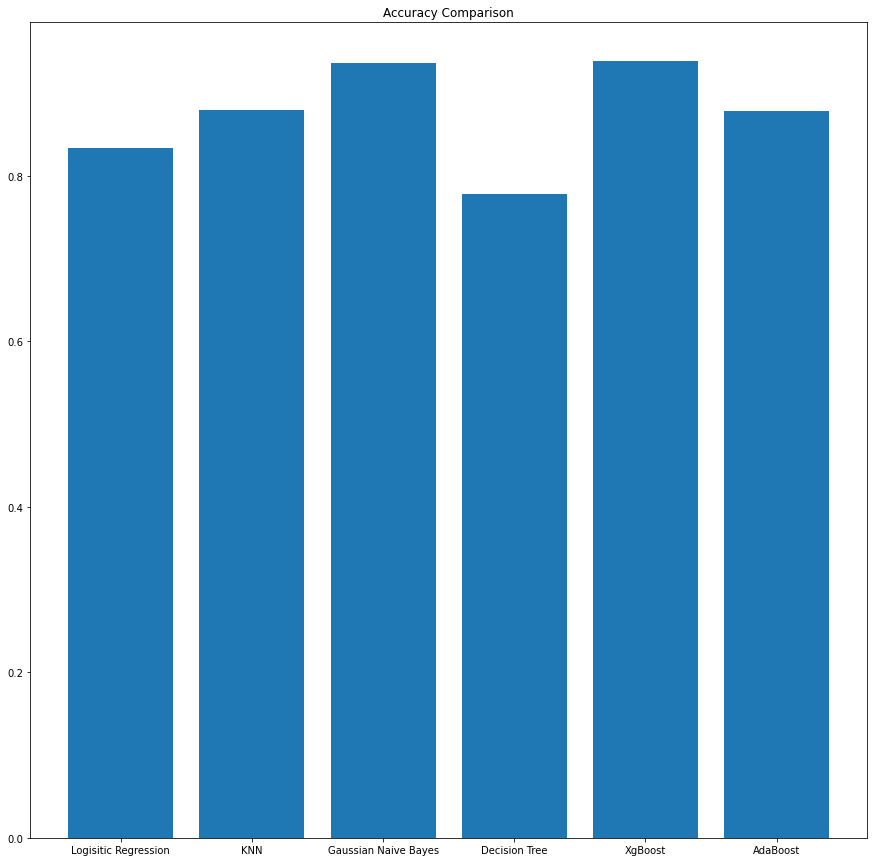

In [132]:
names = ['Logisitic Regression', 'KNN', 'Gaussian Naive Bayes', 'Decision Tree', 'XgBoost', 'AdaBoost']
values = [0.8340648151399178,0.8803061690249641,0.9371335276149012,0.7783434570415365,0.9387486394438398,0.8791299462799761]

plt.figure(figsize=(15, 15))
plt.bar(names, values)
plt.title('Accuracy Comparison')

In [135]:
from sklearn.ensemble import RandomForestClassifier  
classifier_random= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_random.fit(X_sm, y_sm)  
y_pred42 = model.predict(X_test)
cm42 = confusion_matrix(y_test, y_pred42)
print('Confusion matrix for OVersampling(SMOTE) + RF')
print(cm42)

Confusion matrix for OVersampling(SMOTE) + RF
[[47622  9239]
 [   20    81]]


In [136]:
print("RF Accuracy:",accuracy_score(y_test, y_pred42))

RF Accuracy: 0.8374530388680173
